<font size="4" color='#03D3E8'>
    <b>Descriptive Analysis</b>         
</font>

It will be assumed that each flux lecture are independent through time and it will be considered like independent variables. First step, it'll be read train and test dataset

In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import datetime as dt
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV, learning_curve 
from sklearn.metrics import recall_score,cohen_kappa_score,roc_curve, auc,accuracy_score,confusion_matrix,f1_score,precision_score,roc_auc_score,roc_curve
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import random

#Use your directory work, the data do not need a special treatment to read

Train=pd.read_csv('D:\\mis documentos\\Data Science Certificate\\Module 4 - Machine Learning\\Group Assignment\\exoTrain.csv',sep=',')
Test=pd.read_csv('D:\\mis documentos\\Data Science Certificate\\Module 4 - Machine Learning\\Group Assignment\\exoTest.csv',sep=',')

print(Train.shape)
print(Test.shape)

(5087, 3198)
(570, 3198)


In [3]:
pd.set_option('display.max_rows', 5100)
pd.set_option('display.max_columns', 3500)
pd.set_option('display.width', 1000)

In [2]:
Train.head(2)

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93


In [3]:
Test.head(2)

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,...,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,2,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,5569.47,5550.44,...,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72


According with the documentation provided about the dataset:

<br>

<font size="2" color='#03D3E8'>
   <b> Columns</b>
</font>

Label: binary target that indicates 2 if the star observed is confirmed to have at least one exoplanet in orbit, 1 there is no confirmation of exoplanet

$FLUX_i \hspace{1pt} Є \hspace{2pt} \mathbb{Q}$   where each $i=1,...,3197$ this indicates the flux (light intensity) for each star 

<br>

<font size="2" color='#03D3E8'>
   <b> Class Distribution</b>
</font>

Train <br>
1: 5050 - 99.27%
2: 37 - 0.73%

Test <br>
1: 565 - 99,12%
2: 5 - 0.88%

<br>

<font size="2" color='#03D3E8'>
   <b> Data Characteristics</b>
</font>

* The data describe the change in flux (light intensity) of 5,087 stars used in train set and has a total of 570 stars in test set
* There is no presence of NAN values over the measures
* Extreme values presented in the variables reference in minimum and maximum values
* High variables dimension that require a dimension reduction technique, in this case, it will be used Principal Component Analysis PCA


In [4]:
Train.describe()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
count,5087.000000,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,...,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5087.000000,5087.000000,5087.000000,5087.000000
mean,1.007273,1.445054e+02,1.285778e+02,1.471348e+02,1.561512e+02,1.561477e+02,1.469646e+02,1.168380e+02,1.144983e+02,1.228639e+02,...,3.485578e+02,4.956476e+02,6.711211e+02,7.468790e+02,6.937372e+02,6.553031e+02,-494.784966,-544.594264,-440.239100,-300.536399
std,0.084982,2.150669e+04,2.179717e+04,2.191309e+04,2.223366e+04,2.308448e+04,2.410567e+04,2.414109e+04,2.290691e+04,2.102681e+04,...,2.864786e+04,3.551876e+04,4.349963e+04,4.981375e+04,5.087103e+04,5.339979e+04,17844.469520,17722.339334,16273.406292,14459.795577
min,1.000000,-2.278563e+05,-3.154408e+05,-2.840018e+05,-2.340069e+05,-4.231956e+05,-5.975521e+05,-6.724046e+05,-5.790136e+05,-3.973882e+05,...,-3.240480e+05,-3.045540e+05,-2.933140e+05,-2.838420e+05,-3.288214e+05,-5.028894e+05,-775322.000000,-732006.000000,-700992.000000,-643170.000000
25%,1.000000,-4.234000e+01,-3.952000e+01,-3.850500e+01,-3.505000e+01,-3.195500e+01,-3.338000e+01,-2.813000e+01,-2.784000e+01,-2.683500e+01,...,-1.760000e+01,-1.948500e+01,-1.757000e+01,-2.076000e+01,-2.226000e+01,-2.440500e+01,-26.760000,-24.065000,-21.135000,-19.820000
50%,1.000000,-7.100000e-01,-8.900000e-01,-7.400000e-01,-4.000000e-01,-6.100000e-01,-1.030000e+00,-8.700000e-01,-6.600000e-01,-5.600000e-01,...,2.600000e+00,2.680000e+00,3.050000e+00,3.590000e+00,3.230000e+00,3.500000e+00,-0.680000,0.360000,0.900000,1.430000
75%,1.000000,4.825500e+01,4.428500e+01,4.232500e+01,3.976500e+01,3.975000e+01,3.514000e+01,3.406000e+01,3.170000e+01,3.045500e+01,...,2.211000e+01,2.235000e+01,2.639500e+01,2.909000e+01,2.780000e+01,3.085500e+01,18.175000,18.770000,19.465000,20.280000
max,2.000000,1.439240e+06,1.453319e+06,1.468429e+06,1.495750e+06,1.510937e+06,1.508152e+06,1.465743e+06,1.416827e+06,1.342888e+06,...,1.779338e+06,2.379227e+06,2.992070e+06,3.434973e+06,3.481220e+06,3.616292e+06,288607.500000,215972.000000,207590.000000,211302.000000


In [4]:
#Checking NAN values

Train.isna().sum()

LABEL        0
FLUX.1       0
FLUX.2       0
FLUX.3       0
FLUX.4       0
FLUX.5       0
FLUX.6       0
FLUX.7       0
FLUX.8       0
FLUX.9       0
FLUX.10      0
FLUX.11      0
FLUX.12      0
FLUX.13      0
FLUX.14      0
FLUX.15      0
FLUX.16      0
FLUX.17      0
FLUX.18      0
FLUX.19      0
FLUX.20      0
FLUX.21      0
FLUX.22      0
FLUX.23      0
FLUX.24      0
FLUX.25      0
FLUX.26      0
FLUX.27      0
FLUX.28      0
FLUX.29      0
FLUX.30      0
FLUX.31      0
FLUX.32      0
FLUX.33      0
FLUX.34      0
FLUX.35      0
FLUX.36      0
FLUX.37      0
FLUX.38      0
FLUX.39      0
FLUX.40      0
FLUX.41      0
FLUX.42      0
FLUX.43      0
FLUX.44      0
FLUX.45      0
FLUX.46      0
FLUX.47      0
FLUX.48      0
FLUX.49      0
FLUX.50      0
FLUX.51      0
FLUX.52      0
FLUX.53      0
FLUX.54      0
FLUX.55      0
FLUX.56      0
FLUX.57      0
FLUX.58      0
FLUX.59      0
FLUX.60      0
FLUX.61      0
FLUX.62      0
FLUX.63      0
FLUX.64      0
FLUX.65      0
FLUX.66   

In [5]:
Test.isna().sum()

LABEL        0
FLUX.1       0
FLUX.2       0
FLUX.3       0
FLUX.4       0
FLUX.5       0
FLUX.6       0
FLUX.7       0
FLUX.8       0
FLUX.9       0
FLUX.10      0
FLUX.11      0
FLUX.12      0
FLUX.13      0
FLUX.14      0
FLUX.15      0
FLUX.16      0
FLUX.17      0
FLUX.18      0
FLUX.19      0
FLUX.20      0
FLUX.21      0
FLUX.22      0
FLUX.23      0
FLUX.24      0
FLUX.25      0
FLUX.26      0
FLUX.27      0
FLUX.28      0
FLUX.29      0
FLUX.30      0
FLUX.31      0
FLUX.32      0
FLUX.33      0
FLUX.34      0
FLUX.35      0
FLUX.36      0
FLUX.37      0
FLUX.38      0
FLUX.39      0
FLUX.40      0
FLUX.41      0
FLUX.42      0
FLUX.43      0
FLUX.44      0
FLUX.45      0
FLUX.46      0
FLUX.47      0
FLUX.48      0
FLUX.49      0
FLUX.50      0
FLUX.51      0
FLUX.52      0
FLUX.53      0
FLUX.54      0
FLUX.55      0
FLUX.56      0
FLUX.57      0
FLUX.58      0
FLUX.59      0
FLUX.60      0
FLUX.61      0
FLUX.62      0
FLUX.63      0
FLUX.64      0
FLUX.65      0
FLUX.66   

According with the min and max values of the summary data there are extreme values around the orden $-10^5$ and $10^6$. It will be used MinMax transformation over the dataset. 

(5087, 21)


C:\Users\kauni\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\kauni\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


<Figure size 1440x1440 with 0 Axes>

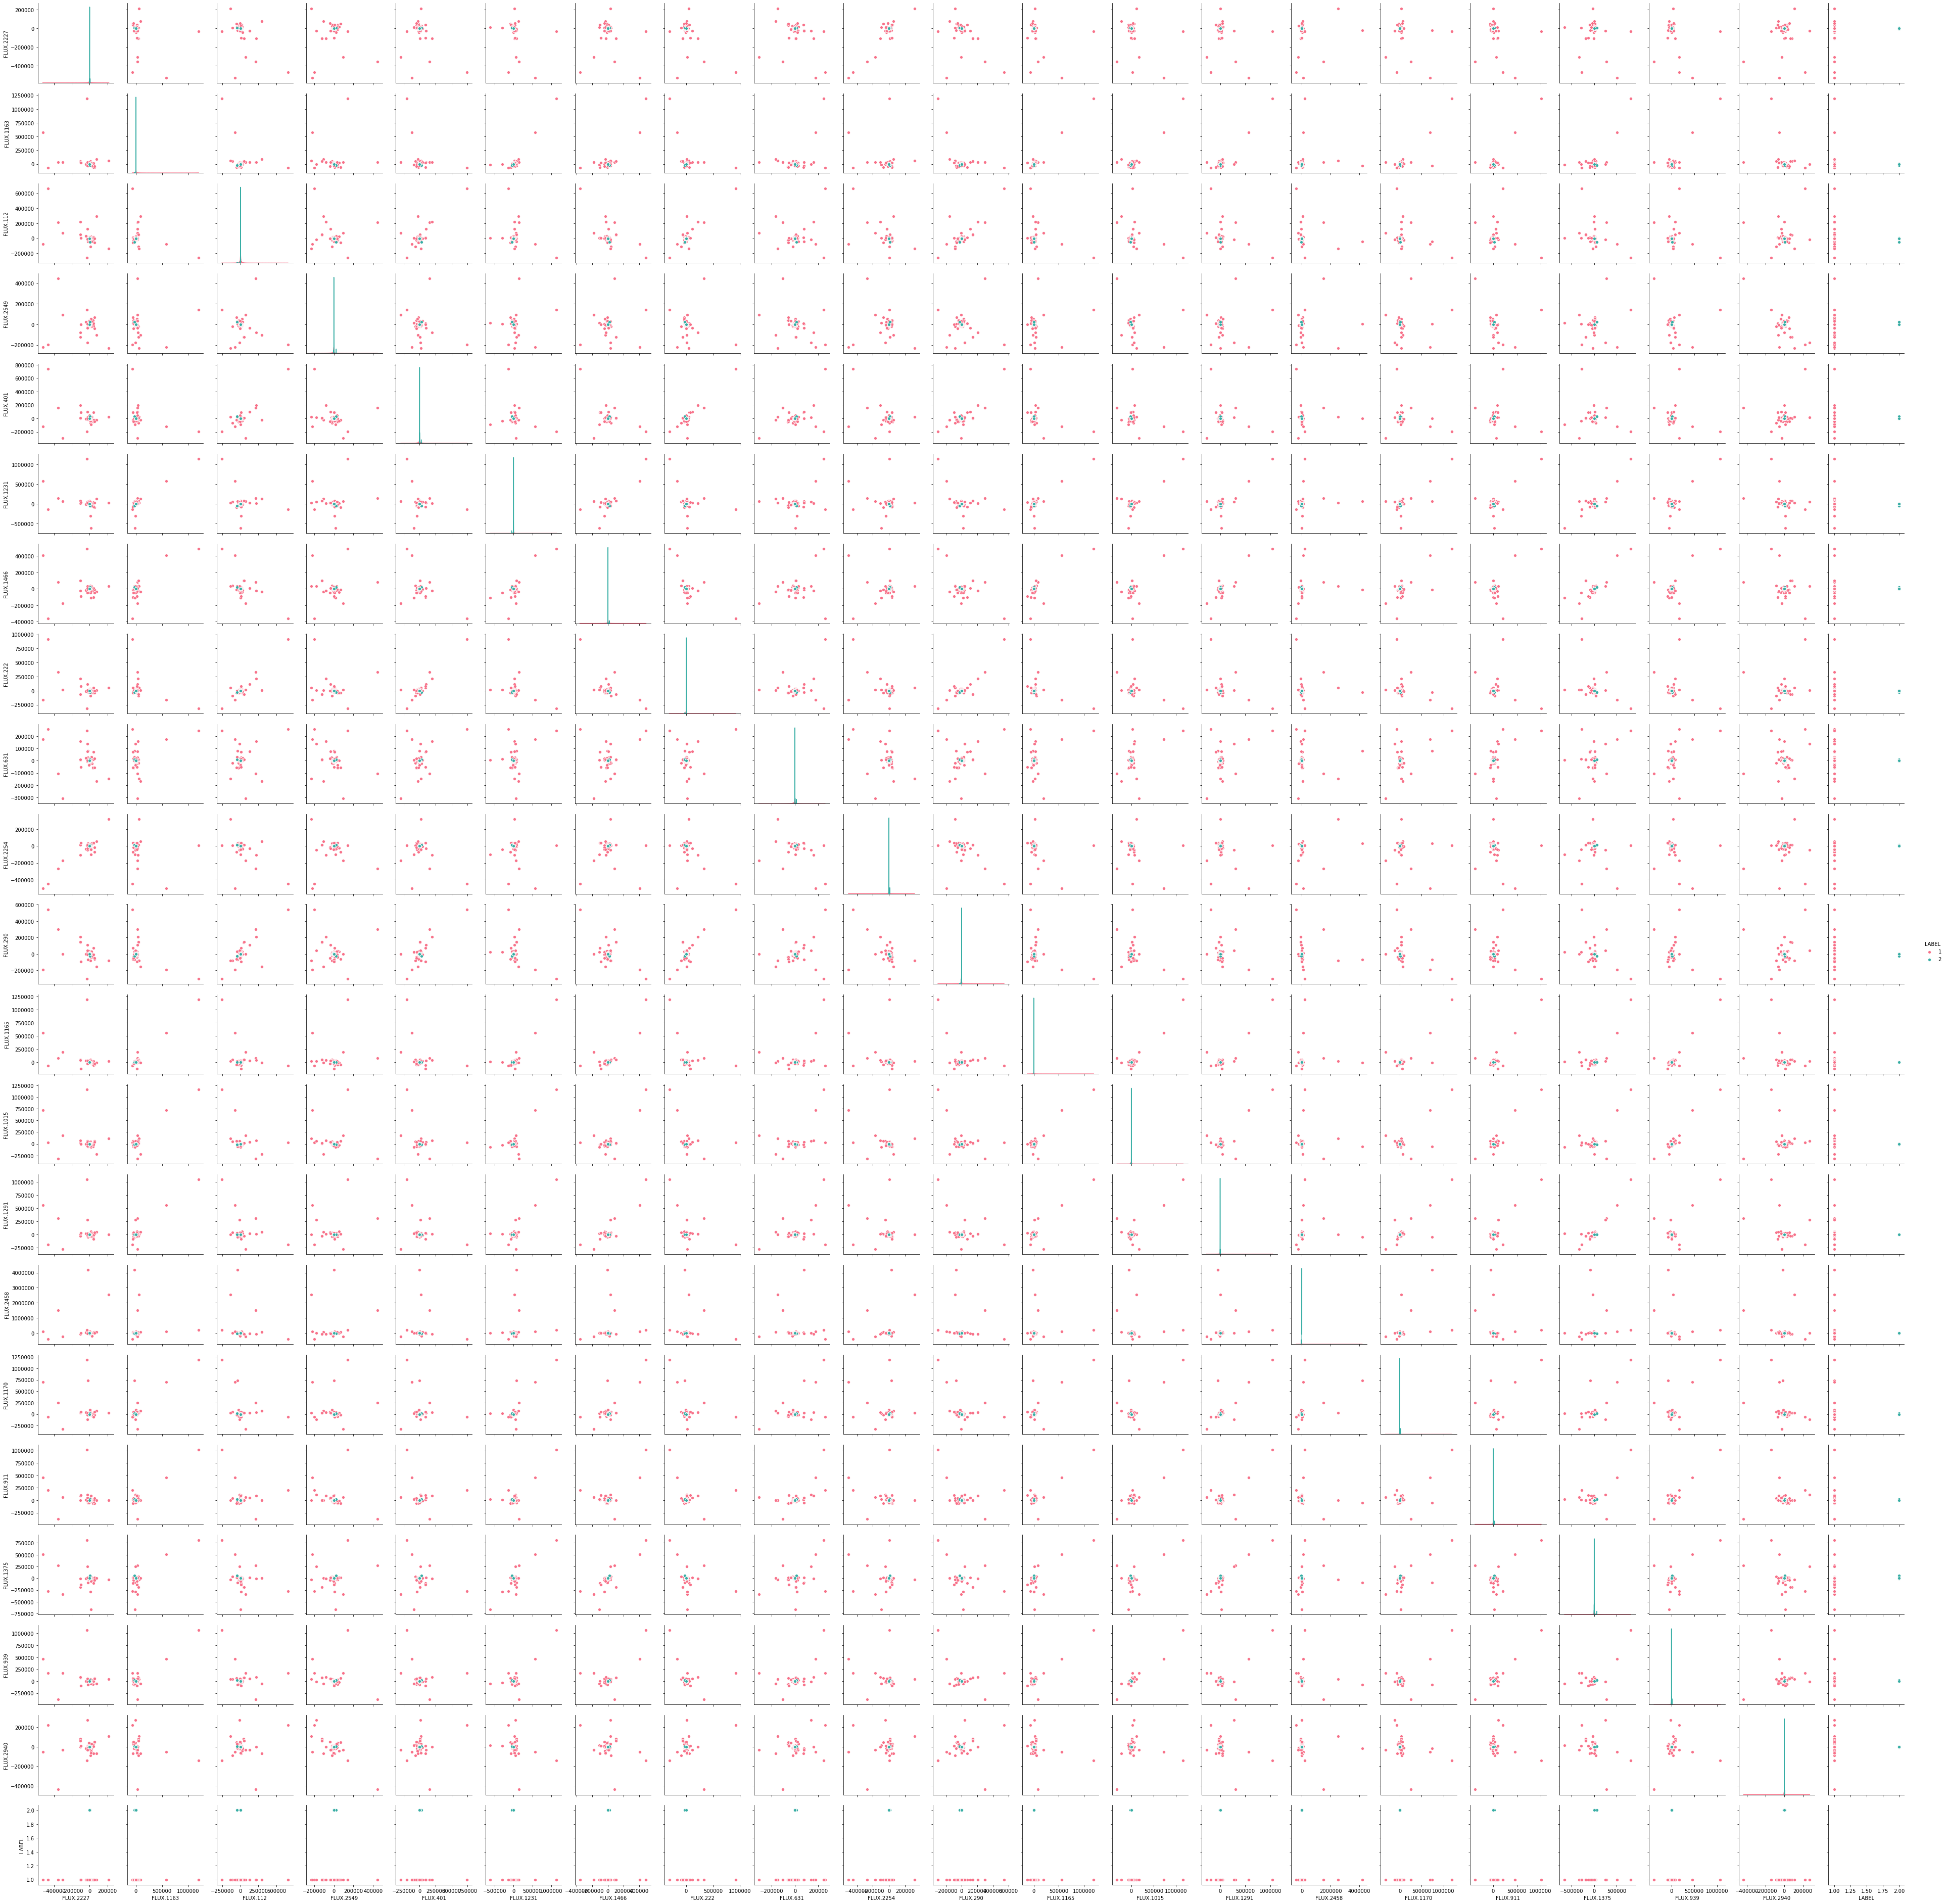

In [3]:
# Selecting a random selection of 20 the variables to show pairplot in train set

np.random.seed(123)

Train_col=list(Train.columns)

Train_col.pop(0)

target=['LABEL']

train_col_rand=random.sample(Train_col,20)

Train2=Train.loc[:,train_col_rand+target]

print(Train2.shape)

#Pairplots for 20 random variables
plt.figure(figsize=(20,20))
sns.pairplot(data=Train2,hue='LABEL',palette='husl')


Outlier in y Fig FLUX.2227
Outlier in y Fig FLUX.1163
Outlier in y Fig FLUX.112
Outlier in y Fig FLUX.2549
Outlier in y Fig FLUX.401
Outlier in y Fig FLUX.1231
Outlier in y Fig FLUX.1466
Outlier in y Fig FLUX.222
Outlier in y Fig FLUX.631
Outlier in y Fig FLUX.2254
Outlier in y Fig FLUX.290
Outlier in y Fig FLUX.1165
Outlier in y Fig FLUX.1015
Outlier in y Fig FLUX.1291
Outlier in y Fig FLUX.2458
Outlier in y Fig FLUX.1170
Outlier in y Fig FLUX.911
Outlier in y Fig FLUX.1375
Outlier in y Fig FLUX.939
Outlier in y Fig FLUX.2940


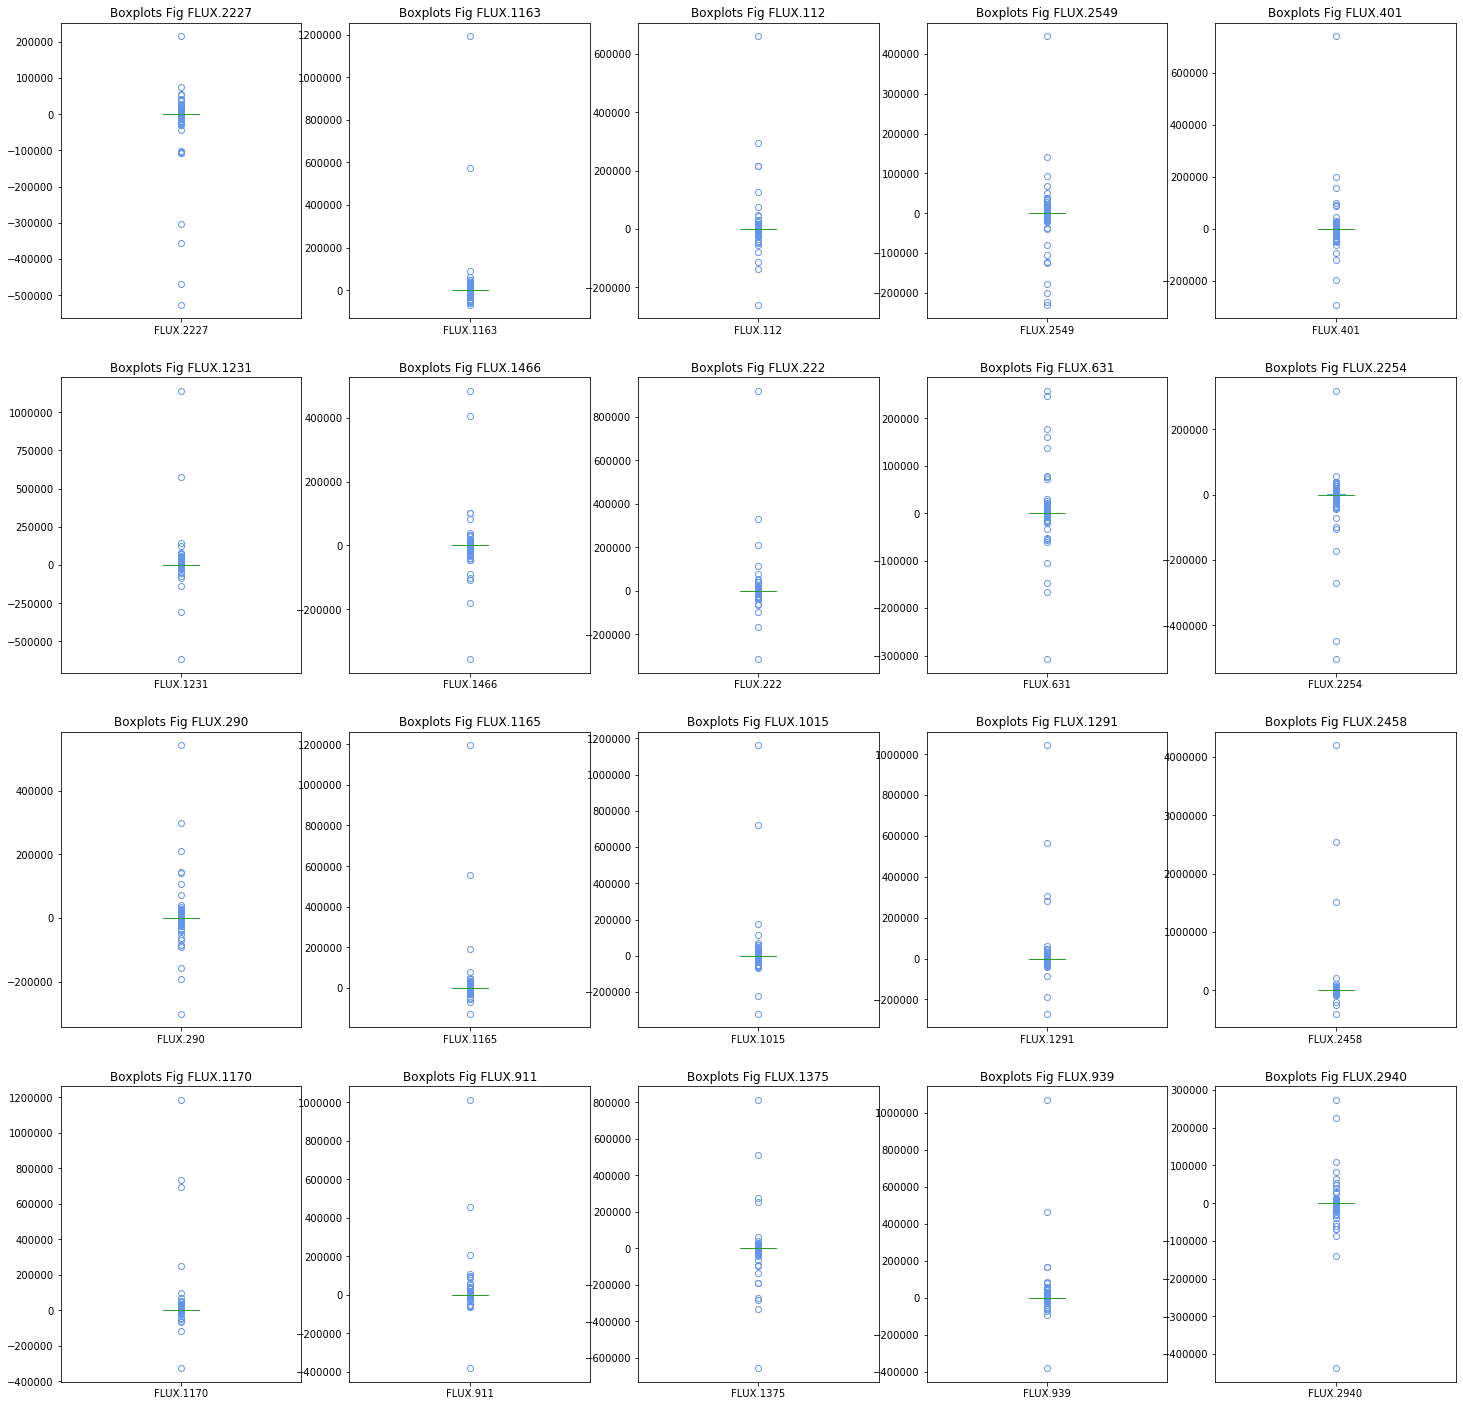

In [62]:
# Random selection of 20 the variables to show boxplot in train set

IQR_y=[]
LS_y=[]
LI_y=[]


fig_box,axes_box=plt.subplots(nrows=4,ncols=5,figsize=(25,25))


for i in range(0,len(train_col_rand)):
       
    IQR_y.append(pd.DataFrame(Train[train_col_rand[i]]).describe().loc['75%']-pd.DataFrame(Train[train_col_rand[i]]).describe().loc['25%'])
    LS_y.append(pd.DataFrame(Train[train_col_rand[i]]).describe().loc['75%']+1.5*IQR_y[i])
    LI_y.append(pd.DataFrame(Train[train_col_rand[i]]).describe().loc['25%']-1.5*IQR_y[i])

    if any(LS_y[i] < pd.DataFrame(Train[train_col_rand[i]])) or any(LI_y[i] > pd.DataFrame(Train[train_col_rand[i]])):
        print('Outlier in y Fig '+str(train_col_rand[i]))
    else:
        print('No outlier in y Fig '+str(train_col_rand[i]))
    
   
    ax_box=axes_box.flatten()
    ax_box[i].set_title('Boxplots Fig '+str(train_col_rand[i]))
    
    c='cornflowerblue'

    pd.DataFrame(Train[train_col_rand[i]]).boxplot(ax=ax_box[i],grid=False,patch_artist=True,
                  boxprops=dict(facecolor=c, color=c),capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=c),
                 medianprops=dict(color=c))
    
    

<font size="4" color='#03D3E8'>
    <b>Undersampling</b>         
</font>

Since the data is high unbalanced, it will be applied undersampling over the class 1

In [7]:
undersampling=pd.DataFrame(Train['LABEL'].value_counts())
undersampling['% Class']=(Train['LABEL'].value_counts(normalize=True))*100
undersampling['% Class Test']=(Test['LABEL'].value_counts(normalize=True))*100

In [29]:
undersampling

,LABEL,% Class,Test,% Class Test
1,5050,99.272656,565,99.122807
2,37,0.727344,5,0.877193


In [25]:
undersampling['LABEL'][2]/undersampling['LABEL'][1]

0.007326732673267326

In [8]:
from math import sqrt

def CCMUT(X,f):
    # 1. finding cluster centroid....
    cluster_centroid = np.sum(X,axis=0)/X.shape[0]
    # 2. finding Euclidean Distance from cluster centroid to samples
    euclidean = [None]*X.shape[0]
    for i in range(0,X.shape[0]):
        euclidean[i] = sqrt(sum((cluster_centroid-X.iloc[i])**2))
    # 3. tracking indices of samples in descending order of distance
    indices = list(reversed(sorted(range(len(euclidean)), 
    key = lambda j: euclidean[j])))
    # 4. removing the instances or under-sampling order-wise....
    X=np.array(X)
    X_f = np.delete(X, indices[:int(f/100*X.shape[0])], axis=0)
    # 5. returning the under-sampled Majority Sample Matrix
    return X_f

In [9]:
Train_under=Train[Train['LABEL']==1]
Test_under=Test[Test['LABEL']==1]

In [6]:
print(Train_under.shape)
print(Test_under.shape)

(5050, 3198)
(565, 3198)


In [10]:
X_f2=pd.DataFrame(CCMUT(Train_under,20),columns=list(Train.columns))
X_f3=pd.DataFrame(CCMUT(Test_under,20),columns=list(Test.columns))

In [8]:
print(X_f2.shape)
print(X_f3.shape)

(4040, 3198)
(452, 3198)


In [11]:
Train2=pd.concat([Train[Train['LABEL']==2],X_f2],axis=0)
Test2=pd.concat([Test[Test['LABEL']==2],X_f3],axis=0)

In [12]:
print(Train2.shape)
print(Test2.shape)

(4077, 3198)
(457, 3198)


In [152]:
Train2.head()

LABEL   FLUX.1   FLUX.2   FLUX.3   FLUX.4   FLUX.5   FLUX.6  FLUX.7   FLUX.8  FLUX.9  FLUX.10  FLUX.11  FLUX.12  FLUX.13  FLUX.14  FLUX.15  FLUX.16  FLUX.17  FLUX.18  FLUX.19  FLUX.20  FLUX.21  FLUX.22  FLUX.23  FLUX.24  FLUX.25  FLUX.26  FLUX.27  FLUX.28  FLUX.29  FLUX.30  FLUX.31  FLUX.32  FLUX.33  FLUX.34  FLUX.35  FLUX.36  FLUX.37  FLUX.38  FLUX.39  FLUX.40  FLUX.41  FLUX.42  FLUX.43  FLUX.44  FLUX.45  FLUX.46  FLUX.47  FLUX.48  FLUX.49  FLUX.50  FLUX.51  FLUX.52  FLUX.53  FLUX.54  FLUX.55  FLUX.56  FLUX.57  FLUX.58  FLUX.59  FLUX.60  FLUX.61  FLUX.62  FLUX.63  FLUX.64  FLUX.65  FLUX.66  FLUX.67  FLUX.68  FLUX.69  FLUX.70  FLUX.71  FLUX.72  FLUX.73  FLUX.74  FLUX.75  FLUX.76  FLUX.77  FLUX.78  FLUX.79  FLUX.80  FLUX.81  FLUX.82  FLUX.83  FLUX.84  FLUX.85  FLUX.86  FLUX.87  FLUX.88  FLUX.89  FLUX.90  FLUX.91  FLUX.92  FLUX.93  FLUX.94  FLUX.95  FLUX.96  FLUX.97  FLUX.98  FLUX.99  FLUX.100  FLUX.101  FLUX.102  FLUX.103  FLUX.104  FLUX.105  FLUX.106  FLUX.107  FLUX.108  FLUX.109  \
0    2.0    93.85    83.81    20.10   -26.98   -39.56  -124.71 -135.18   -96.27  -79.89  -160.17  -207.47  -154.88  -173.71  -146.56  -120.26  -102.85   -98.71   -48.42   -86.57    -0.84   -25.85   -67.39   -36.55   -87.01   -97.72  -131.59  -134.80  -186.97  -244.32  -225.76  -229.60  -253.48  -145.74  -145.74    30.47  -173.39  -187.56  -192.88  -182.76  -195.99  -208.31  -103.22  -193.85  -187.64   -92.25  -119.25   -87.50    -1.86    -4.99    18.01    11.12    61.71    -0.61    42.00   -31.25   -74.58   -51.94   -89.66   -83.04  -118.08  -155.85  -145.74  -188.05  -226.28  -257.38  -299.33  -365.20  -388.95  -127.85  -127.85  -191.19  -203.77  -258.66  -260.33  -252.21  -217.80   -98.54   -76.88   -67.92    -0.76   126.65    81.05   213.36   146.95   123.84    62.65    88.11    13.10    -5.11   -40.05  -110.27  -162.56  -253.87  -253.87  -179.10  -139.10  -232.76  -204.85  -128.70   -135.63    -63.60    -16.94    -45.55     21.85     59.23     92.79    156.19    127.58    118.03   
1    2.0   -38.88   -33.83   -58.54   -40.09   -79.31   -72.81  -86.55   -85.33  -83.97   -73.38   -86.51   -74.97   -73.15   -86.13   -76.57   -61.27   -37.23   -48.53   -30.96    -8.14    -5.54    15.79    45.71    10.61    40.66    16.70    15.18    11.98  -203.70    19.13    19.13    19.13    19.13    19.13    17.02    -8.50   -13.87   -29.10   -34.29   -24.68   -27.62   -31.21   -32.31   -37.52   -46.58   -46.20   -35.79   -42.09   -51.25   -46.61   -33.67   -38.27   -23.61   -18.23   -17.55    -0.22     0.56    22.43    28.33    35.13    24.94    29.11   -26.82     1.16   -12.48   -56.55   -62.42   -82.62    66.14    66.14    50.67    43.14    53.20    18.47   -18.44   -12.78   -38.53   -56.09   -27.70   -21.38   -29.10   252.64    -8.68     8.08   -21.35    -3.00    20.49    35.17    27.96    39.28    46.82    60.29    11.89    11.89    -4.10    16.06   -12.34   -26.87    -3.65    -27.30    -14.11    -18.68    -25.55    -12.89     -8.63    -12.13     -1.96     -9.89     12.68   
2    2.0   532.64   535.92   513.73   496.92   456.45   466.00  464.50   486.39  436.56   484.39   469.66   462.30   492.23   441.20   483.17   481.28   535.31   554.34   562.80   540.14   576.34   551.67   556.69   550.86   577.33   562.08   577.97   530.67   553.27   538.33   527.17   532.50   273.66   273.66   292.39   298.44   252.64   233.58   171.41   224.02   237.69   251.53   236.06   212.31   220.95   249.08   234.14   259.02   280.05   269.55   283.48   375.44   372.03   371.88   381.38   414.12   417.09   420.23   375.52   452.05   418.86   476.64   462.22   433.66   416.38   427.23   424.58   380.53   -61.67   -61.67   -51.02    73.95   -79.20   -49.16  -100.58    -8.92   -49.84   -18.14   -11.61    19.91    70.59    62.75   137.81   184.56   210.28   265.78   251.08   274.30   256.94   270.25   249.88   261.56  -201.22  -201.22  -228.77  -180.75  -166.31  -175.36  -170.64   -118.39   -130.59   -121.50   -164.39   -134.98   -103.72    -72.64    -29.19    -18.44     39.53   

<font size="4" color='#03D3E8'>
    <b>Pipeline</b>         
</font>

It can be seen extreme values with minimum and maximum, it will be normalized the data set using MinMax scaler and passes them using pipeline

In [13]:
variables=list(Train2.columns)
variables.remove('LABEL')

scale_step=('scale',MinMaxScaler())
num_pipe=Pipeline([scale_step])
num_trans=[('num',num_pipe, variables)]

col_trans=ColumnTransformer(transformers=num_trans)
col_trans.fit(Train2[variables])
X_Train=col_trans.transform(Train2[variables])
col_trans.fit(Test2[variables])
X_Test=col_trans.transform(Test2[variables])

In [157]:
X_Train

array([[0.01261927, 0.01419955, 0.01873817, ..., 0.26992834, 0.12744132,
        0.09083501],
       [0.01174924, 0.01330399, 0.01798286, ..., 0.26565206, 0.12785104,
        0.09244394],
       [0.01549551, 0.01764132, 0.02347933, ..., 0.26290003, 0.12462358,
        0.08928939],
       ...,
       [0.01379614, 0.01567786, 0.02105895, ..., 0.27202913, 0.13021741,
        0.09405368],
       [0.01202913, 0.01357744, 0.01851352, ..., 0.26401734, 0.12701022,
        0.09183575],
       [0.01412317, 0.01589375, 0.02136083, ..., 0.26384849, 0.12672207,
        0.0926574 ]])

In [156]:
X_Test

array([[0.14413212, 0.14209879, 0.14209054, ..., 0.90932735, 0.81717075,
        0.87115308],
       [1.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.25454584, 0.25198819, 0.2462473 , ..., 0.83419522, 0.71958662,
        0.8598746 ],
       ...,
       [0.14787911, 0.12982417, 0.1513862 , ..., 0.83821191, 0.66228597,
        0.76261907],
       [0.12581008, 0.12750621, 0.12986952, ..., 0.89376789, 0.72781157,
        0.84244271],
       [0.11763496, 0.11998548, 0.12263533, ..., 0.89785272, 0.73591862,
        0.85490774]])

In [14]:
Y_Train=np.array(Train2['LABEL'])
Y_Test=np.array(Test2['LABEL'])

print(len(Y_Train))
print(len(Y_Test))

4077
457


In [161]:
s=pd.DataFrame(Train2['LABEL'].value_counts())
s['% Class']=(Train2['LABEL'].value_counts(normalize=True))*100
s['% Class Test2']=(Test2['LABEL'].value_counts(normalize=True))*100

In [162]:
s

,LABEL,% Class,% Class Test2
1.0,4040,99.09247,98.905908
2.0,37,0.90753,1.094092


<font size="4" color='#03D3E8'>
    <b>Dimension Reduction </b>        
</font>

It'll be used PCA to reduce dimension. Let's see how many components accumulates at least the 95% explained variance ratio

In [20]:
np.random.seed(123)

pca=PCA()

pca.fit(X_Train)

cum_sum=np.cumsum(pca.explained_variance_ratio_)

dim= np.argmax(cum_sum>=0.95)+1

print('Number of components that explained 95% variance ratio',dim)

Number of components that explained 95% variance ratio 27


In [21]:
# --- Adjusting PCA to 27 components

pca_adj=PCA(n_components=27)
X_Train_PCA=pca_adj.fit_transform(X_Train)
X_Test_PCA=pca_adj.fit_transform(X_Test)
cum_sum_X_Train=np.cumsum(pca_adj.explained_variance_ratio_)



print(len(X_Train_PCA))
print(len(X_Test_PCA))

4077
457


<font size="4" color='#03D3E8'>
    <b>Random Forest with Grid Search</b>         
</font>

It will be tested with grid search and it will be compared with randomized_searchcv to define the best parameters

In [22]:
# Know local directory
os.getcwd()
# Changing local directory
os.chdir('D:\mis documentos\Data Science Certificate\Module 4 - Machine Learning\Group Assignment')

njobs=6
random_state=123

#Grid search #2
# param_randf={
# 'n_estimators':[int(x) for x in np.linspace(4,100, num=20)],
# 'criterion':['gini','entropy'],    
# 'min_samples_split':[x for x in np.linspace(0.0001, 0.001, num = 5)],
# 'min_impurity_decrease': [x for x in np.linspace(0.00001,0.00005, num = 5)],
# 'max_depth': [int(x) for x in np.linspace(2,10, num = 8)],
# 'random_state':[random_state] 
# }

# Grid search #3
# param_randf={
# 'n_estimators':[int(x) for x in np.linspace(50, 150, num = 5)],
# 'criterion':['gini','entropy'],    
# 'min_samples_split':[x for x in np.linspace(0.01, 0.05, num = 5)],
# 'min_impurity_decrease': [x for x in np.linspace(8.333333333333334e-06,0.00005, num = 5)],
# 'max_depth': [int(x) for x in np.linspace(10,35, num = 8)],
# 'max_features':['sqrt','log2',None],
# 'random_state':[random_state] 
# }

# Grid search #4
# param_randf={
# 'n_estimators':[int(x) for x in np.linspace(50, 100, num = 5)],
# 'criterion':['gini','entropy'],    
# 'min_samples_split':[x for x in np.linspace(0.01, 0.02, num = 2)],
# # 'min_impurity_decrease': [x for x in np.linspace(8.333333333333334e-07,8.333333333333334e-06, num = 2)],
# 'max_depth': [int(x) for x in np.linspace(2,10, num = 8)],
# 'max_features':['sqrt','log2',None],
# 'random_state':[random_state],
# 'class_weight'={2:.01,1:.99}    
# }

# #Grid search #5
# param_randf={
# 'n_estimators':[int(x) for x in np.linspace(50, 300, num = 10)],
# 'criterion':['gini','entropy'],    
# 'min_samples_split':[x for x in np.linspace(0.01, 0.02, num = 2)],
# # 'min_impurity_decrease': [x for x in np.linspace(8.333333333333334e-07,8.333333333333334e-06, num = 2)],
# 'max_depth': [int(x) for x in np.linspace(2,100, num = 20)],
# 'max_features':['sqrt','log2',None],
# 'random_state':[random_state]  
# }

# Grid search #6
param_randf={
'n_estimators':[int(x) for x in np.linspace(50, 300, num = 10)],
'criterion':['gini','entropy'],    
'min_samples_split':[x for x in np.linspace(0.01, 0.02, num = 2)],
# 'min_impurity_decrease': [x for x in np.linspace(8.333333333333334e-07,8.333333333333334e-06, num = 2)],
'max_depth': [int(x) for x in np.linspace(2,100, num = 20)],
'max_features':['sqrt','log2',None],
'random_state':[random_state]  
}

start_rf_grid= dt.datetime.now()

rf_grid=GridSearchCV(estimator=RandomForestClassifier(class_weight={2:.01,1:.99} ), param_grid=param_randf,scoring='precision',n_jobs=njobs,cv=5)
rf_grid.fit(X_Train_PCA,Y_Train)

end_rf_grid= dt.datetime.now()

#Saving model - with Grid Search
pickle.dump(rf_grid,open("random_forest_grid_search6.sav", "wb"))

#Loading model - with Grid Search
# rf_grid=pickle.load(open('random_forest_grid_search6.sav','rb'))


total_time_rf_grid=end_rf_grid-start_rf_grid


print('total_time_Grid_Search',total_time_rf_grid)  
print('best_estimator',rf_grid.best_estimator_)
print('best_score',rf_grid.best_score_)
print('best_params',rf_grid.best_params_)

Y_pred_rf_grid=rf_grid.predict(X_Test_PCA)


KS = ks_2samp(Y_pred_rf_grid[Y_Test==2], Y_pred_rf_grid[Y_Test!=2]).statistic
Gini=2*roc_auc_score(Y_Test,Y_pred_rf_grid)-1


summary_list=[]

summary_list.append(['Random Forest with Grid Search',roc_auc_score(Y_Test,Y_pred_rf_grid),accuracy_score(Y_Test,Y_pred_rf_grid),precision_score(Y_Test,Y_pred_rf_grid,pos_label=2),recall_score(Y_Test,Y_pred_rf_grid,pos_label=2),f1_score(Y_Test,Y_pred_rf_grid),KS,Gini])


pd.DataFrame(summary_list,columns=['Model Name','ROC AUC','Accuracy','Precision','Recall','F1','KS','Gini'])



total_time_Grid_Search 2:15:29.541185
best_estimator RandomForestClassifier(bootstrap=True, class_weight={1: 0.99, 2: 0.01},
                       criterion='gini', max_depth=7, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=0.01, min_weight_fraction_leaf=0.0,
                       n_estimators=77, n_jobs=None, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
best_score 0.9921426506879778
best_params {'criterion': 'gini', 'max_depth': 7, 'max_features': None, 'min_samples_split': 0.01, 'n_estimators': 77, 'random_state': 123}


,Model Name,ROC AUC,Accuracy,Precision,Recall,F1,KS,Gini
0,Random Forest with Grid Search,0.782743,0.765864,0.036364,0.8,0.866083,0.565487,0.565487


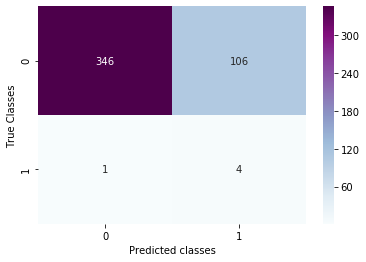

In [205]:
ax=sns.heatmap(confusion_matrix(Y_Test,Y_pred_rf_grid),annot=True,cmap="BuPu",fmt='d')
plt.xlabel('Predicted classes')
plt.ylabel('True Classes')
plt.show()

Text(0.5, 1.0, 'ROC Curve - Random Forest - Grid Search')

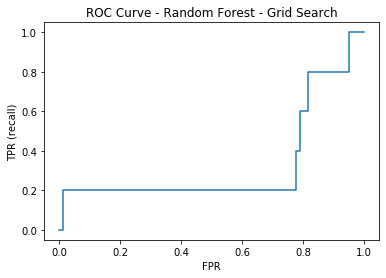

In [210]:
# ROC Curves with Random Forest - Grid Search

y_scores_rf=rf_grid.predict_proba(X_Test_PCA)  

fpr, tpr, thresholds = roc_curve(Y_Test,y_scores_rf[:,0],pos_label=2)
plt.plot(fpr, tpr, label="ROC Curve Random Forest")

plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.title("ROC Curve - Random Forest - Grid Search")


<font size="4" color='#03D3E8'>
    <b>Random Forest with Randomized Search CV</b>         
</font>

It will be tested with randomized search and it will be compared with grid_search to define the best parameters

In [23]:
param_randf={
'n_estimators':[int(x) for x in np.linspace(50, 300, num = 10)],
'criterion':['gini','entropy'],    
'min_samples_split':[x for x in np.linspace(0.01, 0.02, num = 2)],
# 'min_impurity_decrease': [x for x in np.linspace(8.333333333333334e-07,8.333333333333334e-06, num = 2)],
'max_depth': [int(x) for x in np.linspace(2,100, num = 20)],
'max_features':['sqrt','log2',None],
'random_state':[random_state]  
}

start_rf_rscv= dt.datetime.now()

rf_rscv=RandomizedSearchCV(estimator=RandomForestClassifier(class_weight={2:.01,1:.99}), param_distributions=param_randf,scoring='precision',n_jobs=njobs,cv=5)
rf_rscv.fit(X_Train_PCA,Y_Train)

end_rf_rscv= dt.datetime.now()

#Saving model - with Grid Search
pickle.dump(rf_rscv,open("random_forest_rscv2.sav", "wb"))

# Loading model - with Grid Search
# rf_rscv=pickle.load(open('random_forest_rscv2.sav','rb'))


total_time_rf_rscv=end_rf_rscv-start_rf_rscv


print('total_time_rscv_Search',total_time_rf_rscv)  
print('best_estimator',rf_rscv.best_estimator_)
print('best_score',rf_rscv.best_score_)
print('best_params',rf_rscv.best_params_)

Y_pred_rf_rscv=rf_rscv.predict(X_Test_PCA)

KS = ks_2samp(Y_pred_rf_rscv[Y_Test==2], Y_pred_rf_rscv[Y_Test!=2]).statistic
Gini=2*roc_auc_score(Y_Test,Y_pred_rf_rscv)-1

summary_list.append(['Random Forest with RandomizedSearchCV',roc_auc_score(Y_Test,Y_pred_rf_rscv),accuracy_score(Y_Test,Y_pred_rf_rscv),precision_score(Y_Test,Y_pred_rf_rscv,pos_label=2),recall_score(Y_Test,Y_pred_rf_rscv,pos_label=2),f1_score(Y_Test,Y_pred_rf_rscv),KS,Gini])


pd.DataFrame(summary_list,columns=['Model Name','ROC AUC','Accuracy','Precision','Recall','F1','KS','Gini'])

total_time_rscv_Search 0:00:42.637131
best_estimator RandomForestClassifier(bootstrap=True, class_weight={1: 0.99, 2: 0.01},
                       criterion='gini', max_depth=79, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=0.01, min_weight_fraction_leaf=0.0,
                       n_estimators=105, n_jobs=None, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
best_score 0.9921426506879778
best_params {'random_state': 123, 'n_estimators': 105, 'min_samples_split': 0.01, 'max_features': None, 'max_depth': 79, 'criterion': 'gini'}


,Model Name,ROC AUC,Accuracy,Precision,Recall,F1,KS,Gini
0,Random Forest with Grid Search,0.782743,0.765864,0.036364,0.8,0.866083,0.565487,0.565487
1,Random Forest with RandomizedSearchCV,0.786062,0.772429,0.037383,0.8,0.870324,0.572124,0.572124


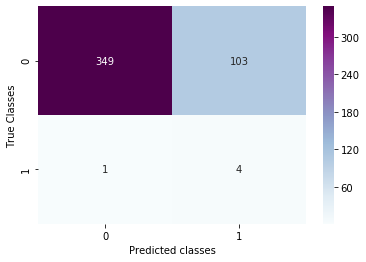

In [24]:
ax=sns.heatmap(confusion_matrix(Y_Test,Y_pred_rf_rscv),annot=True,cmap="BuPu",fmt='d')
plt.xlabel('Predicted classes')
plt.ylabel('True Classes')
plt.show()

Text(0.5, 1.0, 'ROC Curve - Random Forest - Randomized Search CV')

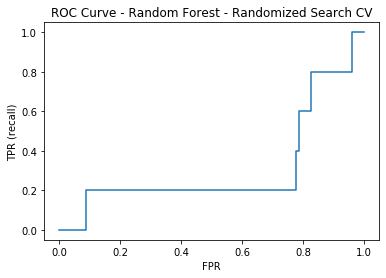

In [211]:
#ROC Curves with Random Forest - Randomized Search CV

y_scores_rscv=rf_rscv.predict_proba(X_Test_PCA)  

fpr, tpr, thresholds = roc_curve(Y_Test,y_scores_rscv[:,0],pos_label=2)
plt.plot(fpr, tpr, label="ROC Curve Random Forest")

plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.title("ROC Curve - Random Forest - Randomized Search CV")


In [19]:
X=np.concatenate((X_Train,X_Test),axis=0)
y=np.concatenate((Y_Train,Y_Test),axis=0)

print(len(X))
print(len(y))

4534
4534


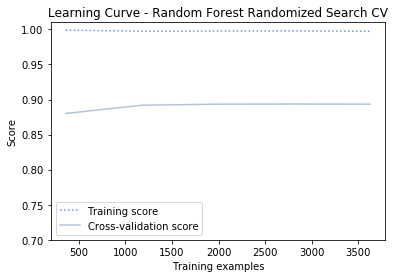

In [20]:
#---------------------------------------------------------------------------------------------------
# Plot Learning Curves
#---------------------------------------------------------------------------------------------------

#------- Random Forest - Randomized Search CV ----------

#Choosing best parameters after Randomized Search CV


estimator=RandomForestClassifier(max_depth=79,n_estimators=105,min_samples_split=0.01,max_features=None,criterion='gini',random_state=random_state)

train_sizes_rf, train_scores_rf, test_scores_rf = learning_curve(estimator=estimator, X=X, y=y, cv=5, n_jobs=njobs,random_state=[random_state])

train_sizes_rf.shape
train_scores_rf.shape
test_scores_rf.shape

train_scores_rf_mean=np.mean(train_scores_rf,axis=1)
test_scores_rf_mean=np.mean(test_scores_rf,axis=1)

plt.plot(train_sizes_rf,train_scores_rf_mean,linestyle=':',color='cornflowerblue',label='Training score')
plt.plot(train_sizes_rf,test_scores_rf_mean,color='lightsteelblue',label='Cross-validation score')
plt.ylim((0.7, 1.01))
plt.title('Learning Curve - Random Forest Randomized Search CV')
plt.ylabel('Score')
plt.xlabel('Training examples')
plt.legend()
plt.show()


According with the results provided, the randomized search cv obtained the best results on ROC-AUC, Accuracy, Recall, KS and Gini also the time processing was better with run time 42 seg vs. 2h 15 min run time for grid search. Even with a high unbalanced test, it could be detected 4 exoplanet from 5 available in the test set. It is remarkable that the model not only predict 1 - normal stars is capable to detect exoplanets as well, this is the challenge when are handled unbalanced classes in a predictive model that is a common scenario in realtime datasets.